In [28]:
import pandas as pd

data = pd.read_csv('./heart_fin1.csv', delimiter=';')

data.info()
y = data['target']
X = data[list(set(data.columns)-set(['target']))]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   target    303 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 23.8 KB


In [29]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=5)

In [31]:
from sklearn.linear_model import LogisticRegression

model_reg = LogisticRegression(max_iter=1000)
model_reg.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Logistic Regression
KNN


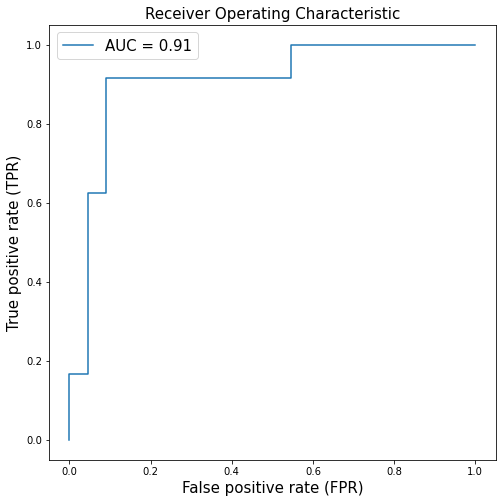

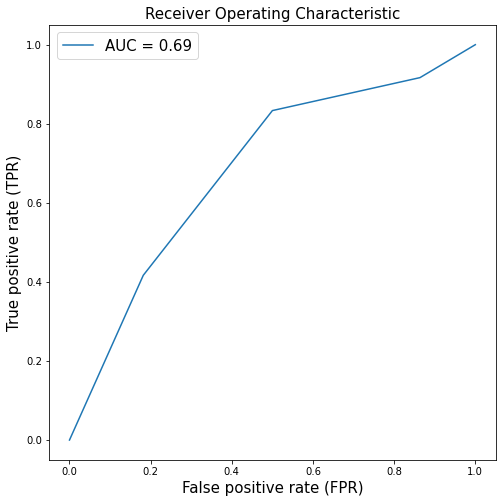

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

# Отрисовать ROC кривую
def calc_and_plot_roc(y_true, y_pred_proba):
    # Посчитать значения ROC кривой и значение площади под кривой AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = roc_auc_score(y_true, y_pred_proba)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.title('Receiver Operating Characteristic', fontsize=15)
    plt.xlabel('False positive rate (FPR)', fontsize=15)
    plt.ylabel('True positive rate (TPR)', fontsize=15)
    plt.legend(fontsize=15)

print('Logistic Regression')
calc_and_plot_roc(y_test, model_reg.predict_proba(X_test)[:, 1])

print('KNN')
calc_and_plot_roc(y_test, model_knn.predict_proba(X_test)[:, 1])
